# *COMPUTATIONAL SCIENCE 2023/2024 - Final Project*

# TASK 1: One-Hot Encoding

In [1]:
!pip install Bio;
!pip install tensorflow;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.9 MB/s eta 0:00:00


In [2]:
from Bio import SeqIO
import numpy as np
from Bio import SeqIO
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
warnings.filterwarnings("ignore")

In [3]:
#Upload ARTIFICIAL and NATURAL
uploaded = files.upload()
file_name_art = list(uploaded.keys())[0]
file_name_nat = list(uploaded.keys())[1]
print(uploaded.keys())
#Parse each uploaded file
records = SeqIO.to_dict(SeqIO.parse(file_name_nat, "fasta"))
records_art = SeqIO.to_dict(SeqIO.parse(file_name_art, "fasta"))

Saving MSA_art.faa to MSA_art.faa
Saving MSA_nat_with_annotation.faa to MSA_nat_with_annotation.faa
dict_keys(['MSA_art.faa', 'MSA_nat_with_annotation.faa'])


In [4]:
#ENCODING
#define a mapping dictionary
amino_acid_mapping = {'A': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'C': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'D': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'E': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'F': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'G': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'H': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'I': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'K': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'L': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'M': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      'N': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                      'P': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                      'Q': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                      'R': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                      'S': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                      'T': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                      'V': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                      'W': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                      'Y': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                      '-': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


#ENCODING NATURAL
one_hot_encoded_sequences = []
labels=[]
for record_id, record in records.items():
    record_=[]
    sequence_encoding=[]
    for amino_acid in record.seq:
        #print(amino_acid, 'amino')
        encoding = amino_acid_mapping.get(amino_acid, amino_acid_mapping)
        #print(encoding, 'traduzione')
        sequence_encoding.extend(encoding)
        record_.append(amino_acid)

    one_hot_encoded_sequences.append(sequence_encoding)
    labels.append(record_)

#Convert the list to a NumPy array
hot_enc_seq = np.array(one_hot_encoded_sequences)
print("Natural: ",hot_enc_seq.shape)


#ENCODING ARTIFICIAL
one_hot_encoded_sequences_art = []
labels_art=[]
for record_id, record in records_art.items():
    record_art=[]
    sequence_encoding_art=[]
    for amino_acid in record.seq:
        encoding = amino_acid_mapping.get(amino_acid, amino_acid_mapping)
        sequence_encoding_art.extend(encoding)
        record_art.append(amino_acid)

    one_hot_encoded_sequences_art.append(sequence_encoding_art)
    labels_art.append(record_)

#Convert the list to a NumPy array
hot_enc_seq_art = np.array(one_hot_encoded_sequences_art)
print("Artificial: ",hot_enc_seq_art.shape)

Natural:  (1130, 1920)
Artificial:  (1003, 1920)


In [5]:
#NATURAL
colori=[]
labels_nat=[]
labels_art=[]
n_functional_nat=0
for record_id, record in records.items():
    # Accessing information in the record
    description_parts = record.description.split()

    # Extract the functionality information (assuming it's the last part)
    functionality = description_parts[-1].lower()
    if functionality == 'functional_true':
        n_functional_nat+=1
        labels_nat.append(1)
        colori.append('purple')
    else:
        labels_nat.append(0)
        colori.append('yellow')
print('fraction of functionals in nat', n_functional_nat/len(colori))


#ARTIFICIAL
n_functional_art=0
colori_art=[]
for record_id, record in records_art.items():
    # Accessing information in the record
    description_parts = record.description.split()

    # Extract the functionality information (assuming it's the last part)
    functionality = description_parts[-1].lower()
    if functionality == 'functional_true':
        n_functional_art+=1
        colori_art.append('purple')
        labels_art.append(1)
    else:
        colori_art.append('yellow')
        labels_art.append(0)

print(len(colori), len(colori_art))
print('fraction of functionals in art', n_functional_art/len(colori_art))

fraction of functionals in nat 0.3743362831858407
1130 1003
fraction of functionals in art 0.49750747756729813


In [6]:
#Dataset with both nat and art
total = np.concatenate((hot_enc_seq, hot_enc_seq_art))
#0 nat, 1 art
art_or_nat = np.concatenate((np.zeros(len(hot_enc_seq)), np.ones(len(hot_enc_seq_art))))

#TASK 2: Dimentional Reduction

## Nat Principal Components

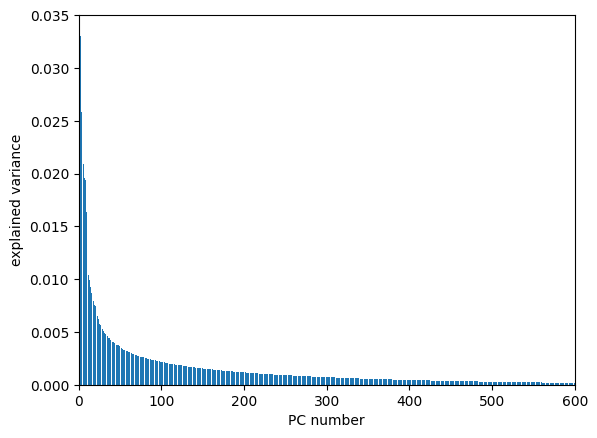

variance explained with 2 components: 0.07638790852685823 %
variance explained with 3 components: 0.10217976124271269 %


In [7]:
#NATURAL SEQUENCES
X = hot_enc_seq
pca = PCA().fit(X)
variances=pca.explained_variance_ratio_
plt.bar(range(1,len(variances )+1),variances)
plt.xlabel('PC number')
plt.ylabel('explained variance');
plt.ylim(0,0.035)
plt.xlim(0,600)
plt.show()
print('variance explained with 2 components:', np.sum(variances[0:2]),'%')
print('variance explained with 3 components:', np.sum(variances[0:3]),'%')

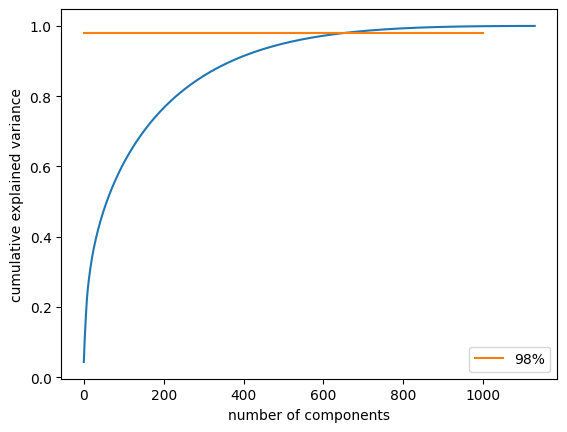

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
x=[i for i in range (0,1000)]
y=[0.98]*1000
x_2=[2*100]
plt.plot(x,y, label = '98%')#cumulative sum
plt.xlabel('number of components')
plt.legend()
plt.ylabel('cumulative explained variance');
plt.show()

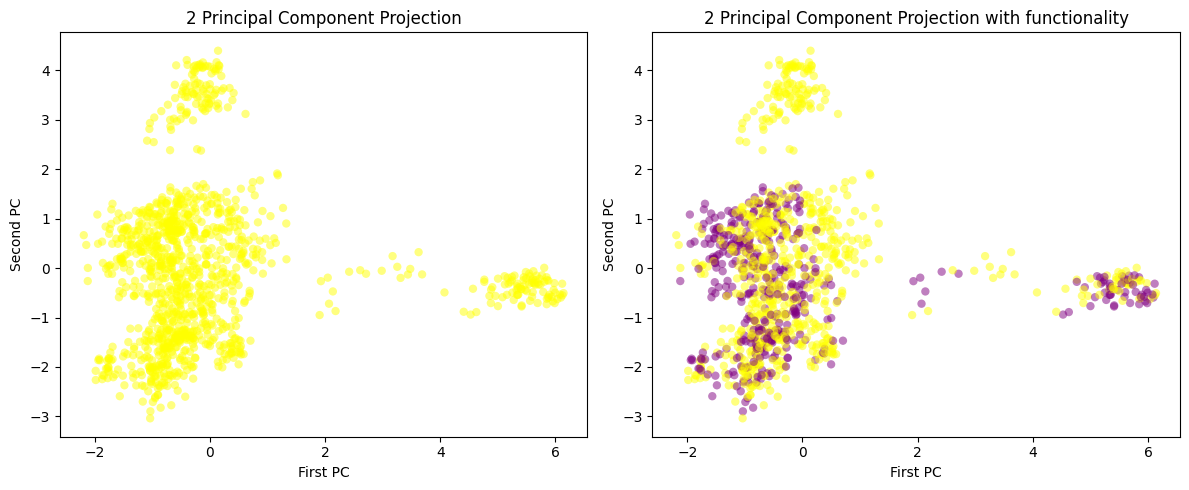

In [9]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PCA transformation for the natural dataset
pca = PCA(2).fit(hot_enc_seq)
Xproj = pca.transform(hot_enc_seq)

# Left subplot without colors
axes[0].scatter(Xproj[:, 0], Xproj[:, 1], color='yellow', edgecolor='none', alpha=0.5)
axes[0].set_title("2 Principal Component Projection")
axes[0].set_xlabel("First PC")
axes[0].set_ylabel("Second PC")
# Right subplot with original colors
axes[1].scatter(Xproj[:, 0], Xproj[:, 1], c=colori, edgecolor='none', alpha=0.5)
axes[1].set_title("2 Principal Component Projection with functionality")
axes[1].set_xlabel("First PC")
axes[1].set_ylabel("Second PC")
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##Comparison of Nat and Art Data in the 2PC Nat Space

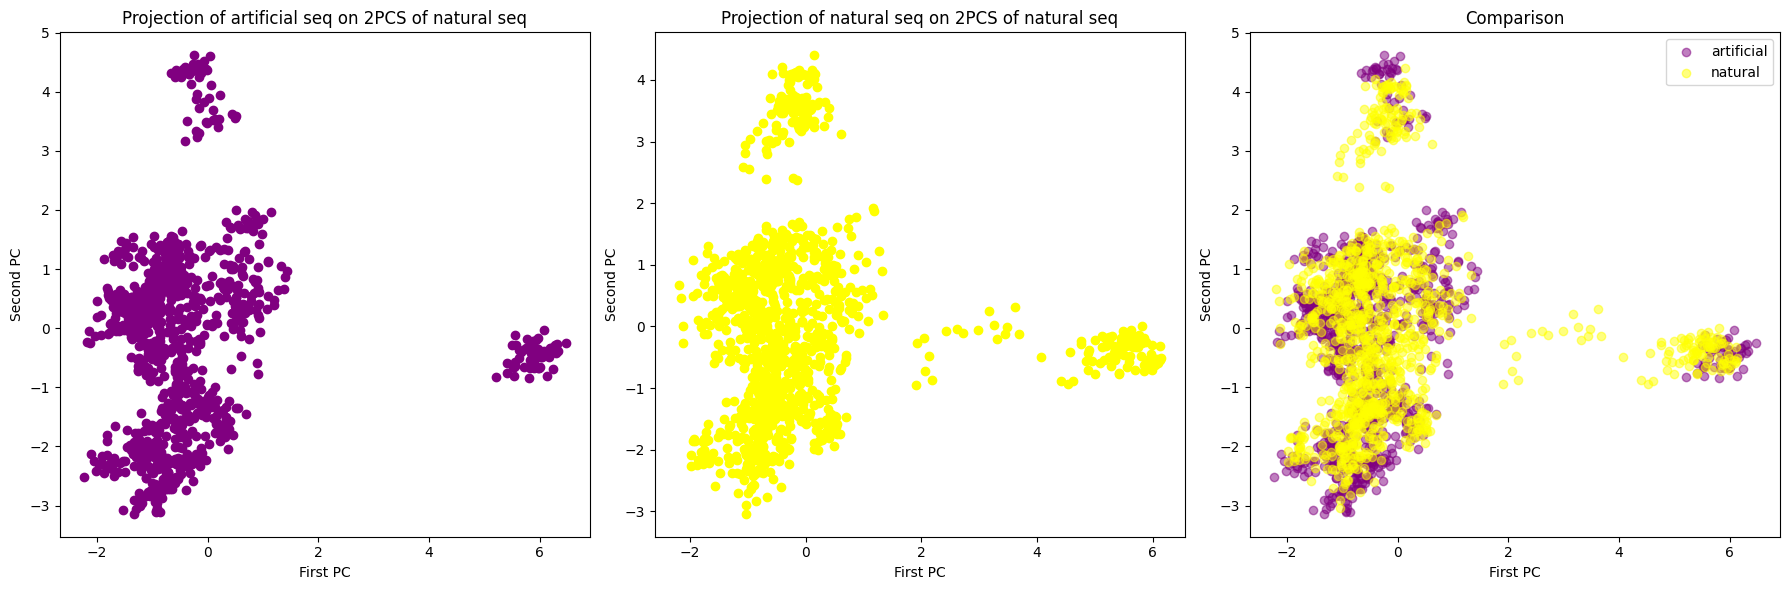

In [10]:
pca = PCA(2).fit(hot_enc_seq)
hd_proj_2 = pca.transform(hot_enc_seq_art)
hd_proj_2_n = pca.transform(hot_enc_seq)

plt.style.use('default')
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


axs[0].scatter(hd_proj_2[:, 0], hd_proj_2[:, 1], color='purple')
axs[0].set_title("Projection of artificial seq on 2PCS of natural seq")
axs[0].set_xlabel("First PC")
axs[0].set_ylabel("Second PC")

axs[1].scatter(hd_proj_2_n[:, 0], hd_proj_2_n[:, 1], color='yellow')
axs[1].set_title("Projection of natural seq on 2PCS of natural seq")
axs[1].set_xlabel("First PC")
axs[1].set_ylabel("Second PC")

axs[2].scatter(hd_proj_2[:, 0], hd_proj_2[:, 1], color='purple', label = 'artificial',alpha=0.5)
axs[2].scatter(hd_proj_2_n[:, 0], hd_proj_2_n[:, 1], color='yellow', label = 'natural' , alpha=0.5)
axs[2].set_title("Comparison")
axs[2].set_xlabel("First PC")
axs[2].set_ylabel("Second PC")
axs[2].legend()

plt.tight_layout()
plt.show()

Let's also study how similar the principal components of the generated data are wrt the natural ones:

In [11]:
#SCALAR PRODUCT
pca = PCA(2).fit(hot_enc_seq)  #from 1920 to 2 dimensions
pca_art = PCA(2).fit(hot_enc_seq_art)

Xproj = pca.transform(hot_enc_seq)
Xproj_art = pca.fit_transform(hot_enc_seq_art)
Xproj_total = pca.transform(total)



PCnat = pca.components_
PCart = pca_art.components_

#bro e' semplicemente questo, e da tipo 0.9999999 quindi sono quasi paralleli
print(np.dot(PCart[1],PCnat[1]))

0.9999992135101349


#TASK 3: Clustering

We will approach the clustering problem with the KMEANS algorithm. We will visualize the data both with PCA and t-SNE dimentional reduction, in order to study the correct number of clusters, and the class separation in space.
We will then repeat the same procedure to study the separation between natural and artificial data.

In [12]:
def majority_vote(X,K,y_clust,nature):
  if nature =='art':
    Z = labels_art
  if nature == 'nat':
    Z = labels_nat
  if nature == 'both':
    Z = np.concatenate((labels_nat, labels_art))
  percentuali = np.zeros(K)
  totali= np.zeros(K)
  majority_vote = np.zeros(K)
  cluster_colors=np.zeros(len(Z))

  l = 0
  for i in y_clust:      #itera nei cluster labels di ogni elemento
      majority_vote[i-1] += int((2*Z[l]-1)) #assegna ad ogni cluster 0 -> -1 e
      percentuali[i-1] += Z[l]
      totali[i-1]+=1
      l+=1

  for i in range(K):
      if majority_vote[i] > 0:
          majority_vote[i] = 1
      else:
          majority_vote[i] = 0

  p=0
  for i in y_clust:
    p+=1
    f=majority_vote[i]
    cluster_colors[p-1] = f

  #majority_color = colori
  #for i in range(len(colori)):
     # majority_color[i] = majority_vote[y_kmeans[i]]
  for i in range(K):
    if totali[i] != 0:
        percentuali[i] = percentuali[i]/totali[i]
    else:
        percentuali[i] = 0
  return(cluster_colors, percentuali)

##Clusters PCA Visualization for Nat Sequences

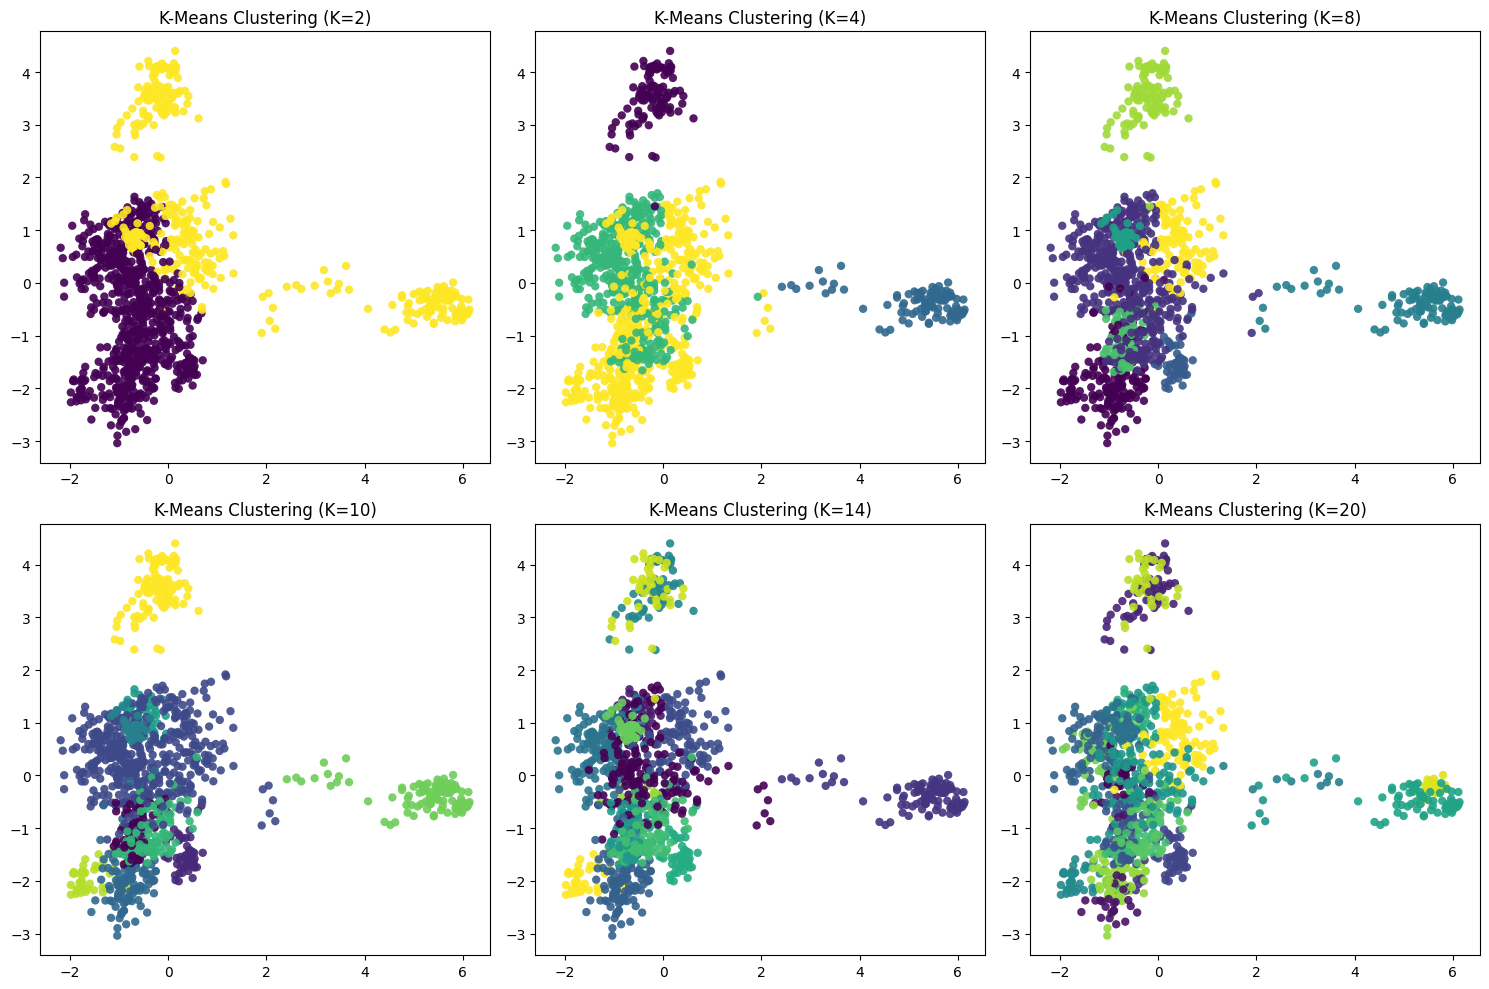

In [13]:
pca = PCA(2)  # project from 1920 to 2 dimensions
Xproj = hot_enc_seq
Xproj = pca.fit_transform(X)

def plot_clusters_subplot(X, K, position):
    #accuracy_score(digits.target, labels)
    est = KMeans(K)
    est.fit(X)
    y_kmeans = est.predict(X)
    plt.subplot(2, 3, position)
    plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y_kmeans, edgecolor='none', alpha=0.9)
    plt.title(f'K-Means Clustering (K={K})')

plt.figure(figsize=(15, 10))

plot_clusters_subplot(X, K=2, position=1)
plot_clusters_subplot(X, K=4, position=2)
plot_clusters_subplot(X, K=8, position=3)
plot_clusters_subplot(X, K=10, position=4)
plot_clusters_subplot(X, K=14, position=5)
plot_clusters_subplot(X, K=20, position=6)

plt.tight_layout()
plt.show()

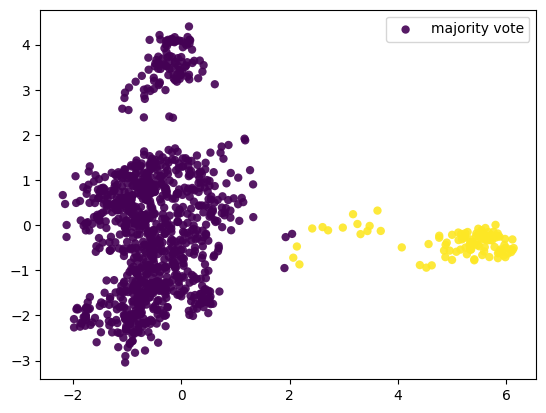

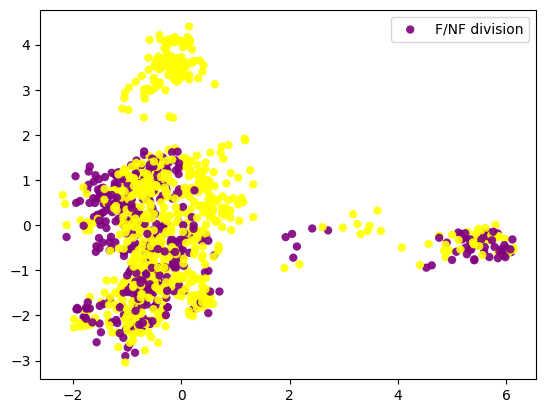

[0.47010309 0.17307692 0.48543689 0.53571429 0.375      0.
 0.01834862 0.23333333]


In [14]:
#majority vote
X=hot_enc_seq
Xproj = pca.fit_transform(X)
K=8
est = KMeans(K)
est.fit(hot_enc_seq)
y_kmeans = est.predict(hot_enc_seq)

colori_kmeans , percentuali= majority_vote(X,K,y_kmeans,'nat')

plt.scatter(Xproj[:, 0], Xproj[:, 1], c=colori_kmeans, edgecolor='none', alpha=0.9,label='majority vote')
plt.legend()
plt.show()
plt.scatter(Xproj[:, 0], Xproj[:, 1],c=colori,edgecolor='none',alpha=0.9, label='F/NF division')
plt.legend()

plt.show()

print(percentuali)

##Clusters t-SNE Visualization for Nat Sequences

Let us first visualize the dataset in the t-SNE dimentional reducted space

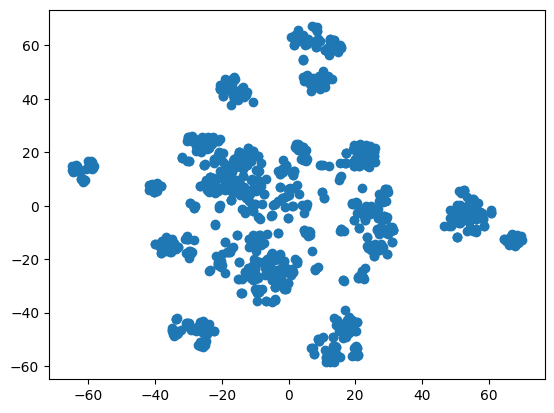

In [15]:
tsne=TSNE(n_components=2, perplexity=20);
X_emb=tsne.fit_transform(X);
X_emb.shape
plt.scatter(X_emb[:,0], X_emb[:,1])

Let's see what we get for different values of the perplexity.

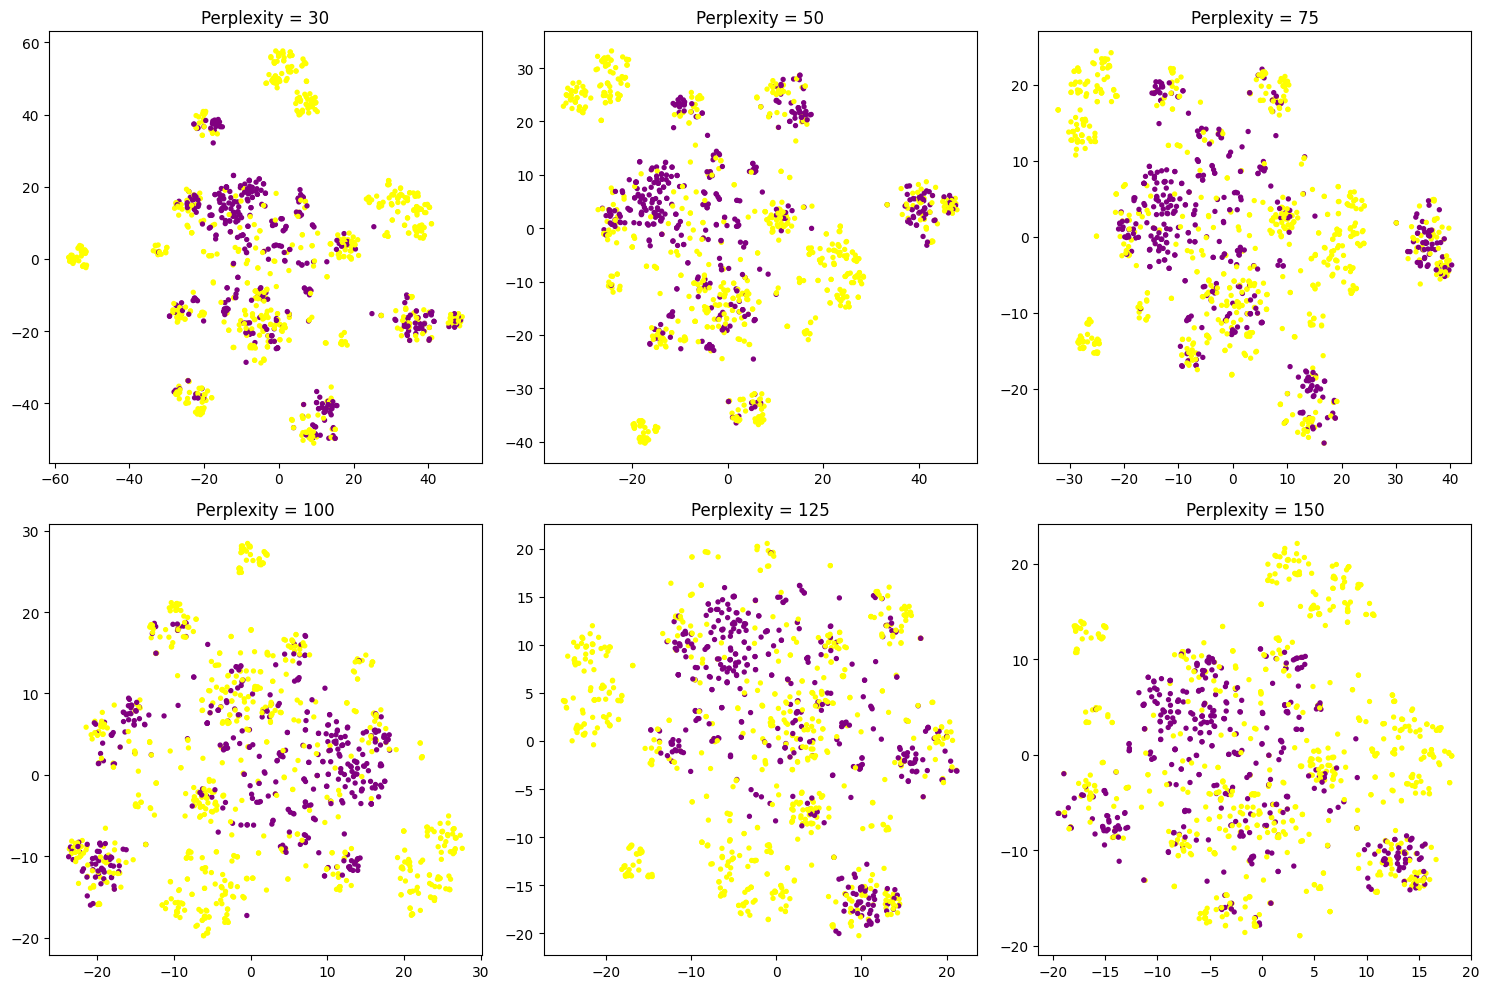

In [16]:
perplexities = [30, 50, 75, 100, 125, 150]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_emb = tsne.fit_transform(X)

    axes[i].scatter(X_emb[:, 0], X_emb[:, 1], c=colori, s=8)
    axes[i].set_title(f'Perplexity = {perplexity}')

plt.tight_layout()
plt.show()

Let's cluster again and visualize the data with t-SNE, with perplexity fixed to 30. We change the number of total clusters and calculate again the majority vote for each $K$.

[0.37262357 0.48       0.33609959]
Number clusters 3
[0.25434783 0.48       0.55364807 0.        ]
Number clusters 4
[0.48       0.51231527 0.         0.225      0.        ]
Number clusters 5
[0.15436242 0.48       0.33469388 0.1443299  0.53571429 0.46373626]
Number clusters 6
[0.48514851 0.37313433 0.1443299  0.         0.53571429 0.09677419
 0.62184874]
Number clusters 7
[0.1122449  0.48       0.53571429 0.37563452 0.         0.625
 0.         0.23333333]
Number clusters 8
[0.16       0.06153846 0.62893082 0.53571429 0.36734694 0.17307692
 0.49514563 0.         0.23333333]
Number clusters 9
[0.37563452 0.         0.23333333 0.67790262 0.53571429 0.48
 0.         0.17307692 0.51111111 0.1576087 ]
Number clusters 10
[0.48514851 0.61093248 0.375      0.23333333 0.         0.17307692
 0.51807229 0.         0.53571429 0.01834862 0.36956522]
Number clusters 11
[0.49038462 0.08196721 0.23333333 0.         0.3681592  0.51111111
 0.53571429 0.617737   0.         0.17307692 0.         0.      

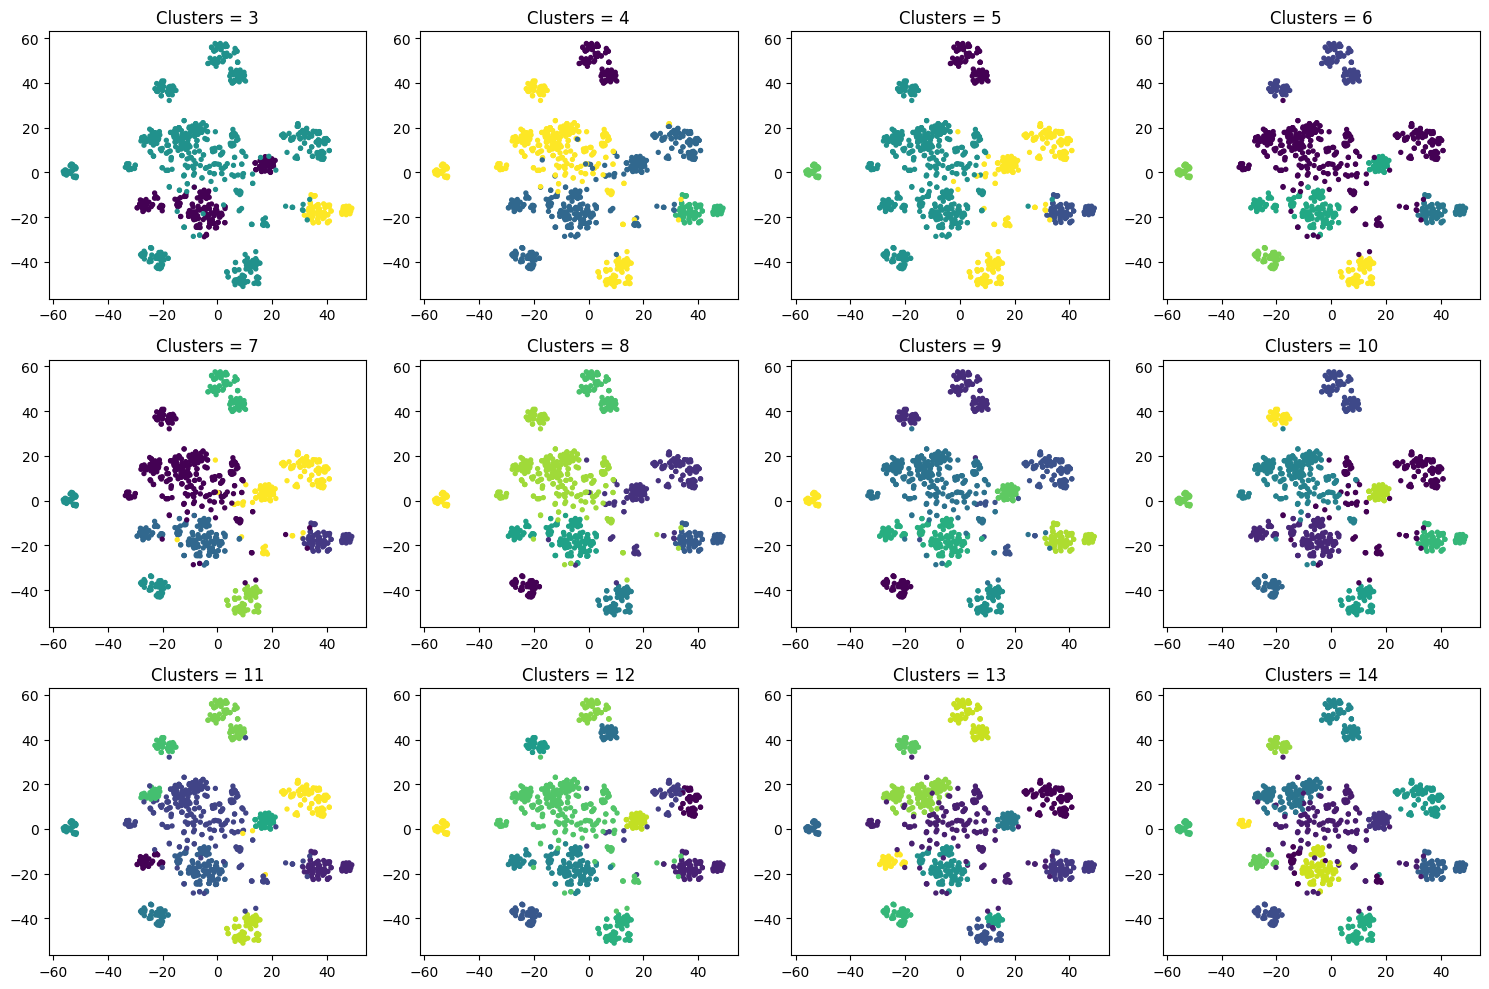

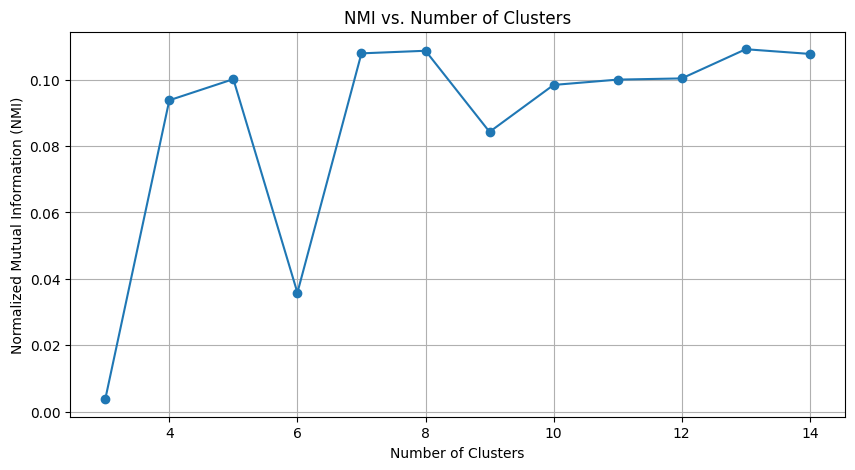

In [17]:
# Define a function to calculate NMI
def calculate_nmi(true_labels, predicted_labels):
    return normalized_mutual_info_score(true_labels, predicted_labels)

perplexity = 30
num_clusters_range = np.arange(3, 15)
nmi_scores=[]


fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

for i, num_clusters in enumerate(num_clusters_range):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(hot_enc_seq)
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    #majority vote
    colori_kmeans , percentuali = majority_vote(hot_enc_seq,num_clusters,labels,'nat')
    print(percentuali)

    #Calculate NMI
    nmi = calculate_nmi(labels_nat, labels)
    nmi_scores.append(nmi)
    #purity = sum(percentuali)/len(percentuali)  !! questa e' la avg % di funzionali penso che la purity sia la avg % della piu' numerosa del cluster, ci sta lo stesso ma non possiamo chiamarla purity
    X_emb = tsne.fit_transform(hot_enc_seq)
    #percentuali

    # Scatter plot with different colors for each cluster
    axes[i].scatter(X_emb[:, 0], X_emb[:, 1], c=labels, cmap='viridis', s=8)
    axes[i].set_title(f'Clusters = {num_clusters}')
    print( 'Number clusters' , num_clusters )#), 'purity', purity)

plt.tight_layout()
# Plot NMI vs. number of clusters
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, nmi_scores, marker='o')
plt.title('NMI vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Mutual Information (NMI)')
plt.grid(True)
plt.show()

## Clustering onto the Unified Dataset and Study of the Art/Nat separation

K = 3  percs are [0.65562914 0.46666667 0.53872283]
K = 4  percs are [0.54424242 0.65789474 0.46411483 0.52439024]
K = 5  percs are [0.5859375  0.55504056 0.46312684 0.46551724 0.66013072]
K = 6  percs are [0.48969889 0.5529132  0.65789474 0.68874172 0.42718447 0.42352941]
K = 7  percs are [0.43269231 0.49038462 0.46823529 0.4874477  0.66013072 0.57843137
 0.68874172]
K = 8  percs are [0.28169014 0.34810127 0.41897233 0.47014925 0.67790262 0.65789474
 0.58914729 0.47868852]
K = 9  percs are [0.65625    0.46682464 0.34810127 0.50445104 0.65789474 0.53623188
 0.42352941 0.59652928 0.68874172]
K = 10  percs are [0.5743073  0.50862069 0.46363636 0.65625    0.68874172 0.43063584
 0.65789474 0.44923077 0.43269231 0.63888889]
K = 11  percs are [0.71323529 0.34497817 0.65789474 0.7211329  0.46363636 0.42718447
 0.18032787 0.68874172 0.52631579 0.37869822 0.42352941]
K = 12  percs are [0.71323529 0.46666667 0.46363636 0.68874172 0.65789474 0.42718447
 0.7254902  0.42352941 0.13414634 0.16239316

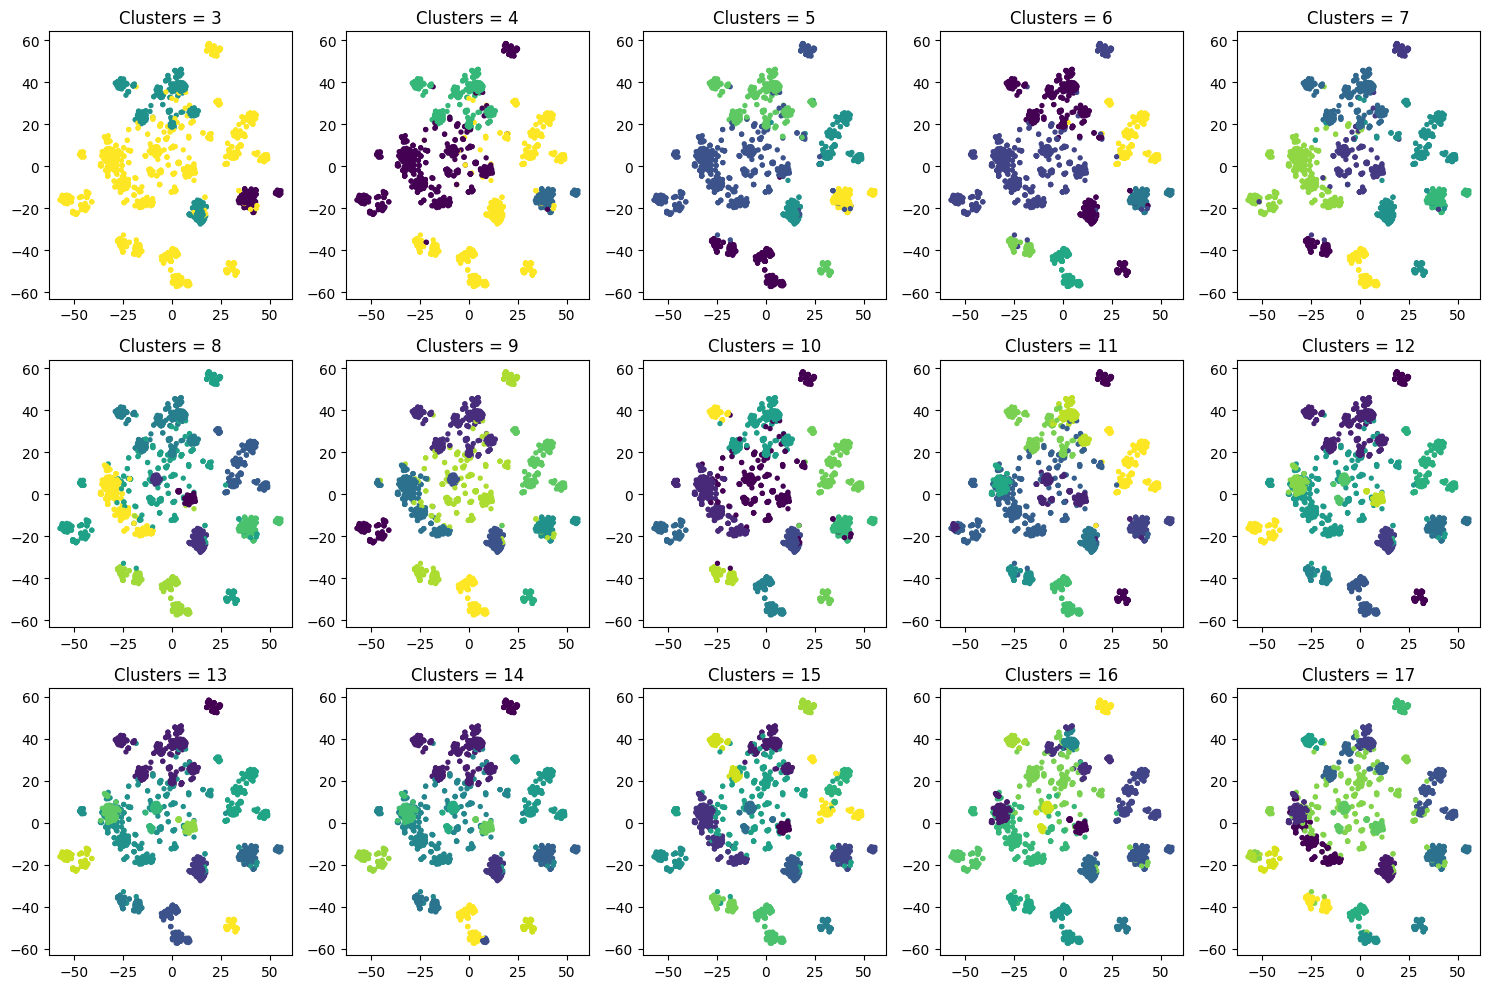

In [18]:
perplexity = 30
num_clusters_range = range(3, 18)

# Assuming X is your data and colori is the color information for each point
# Replace these with your actual data and color information
nmi_scores_art=[]
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()
X=total

for i, num_clusters in enumerate(num_clusters_range):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    colori_kmeans , percentuali= majority_vote(X, num_clusters ,labels,'both')
    #Calculate NMI
    #nmi = calculate_nmi(labels_art, labels)
    #nmi_scores_art.append(nmi)


    X_emb = tsne.fit_transform(hot_enc_seq)

    X_emb = tsne.fit_transform(X)
    #percentuali
    # Scatter plot with different colors for each cluster
    count=np.zeros(num_clusters)
    tot=np.zeros(num_clusters)
    for index, cluster in enumerate(labels):#conto le naturali
        if art_or_nat[index] == 0:
                count[cluster] += 1
                tot[cluster] += 1
        else:
            tot[cluster]+=1
    print('K =' , num_clusters , ' percs are', np.array(count)/np.array(tot))
    axes[i].scatter(X_emb[:, 0], X_emb[:, 1], c=labels, cmap='viridis', s=8)
    axes[i].set_title(f'Clusters = {num_clusters}')

plt.tight_layout()
plt.show()

#TASK 4: Classification

## Logistic Regression

###Natural Sequences: Train, Validation, Test

The accuracy is 100.0%


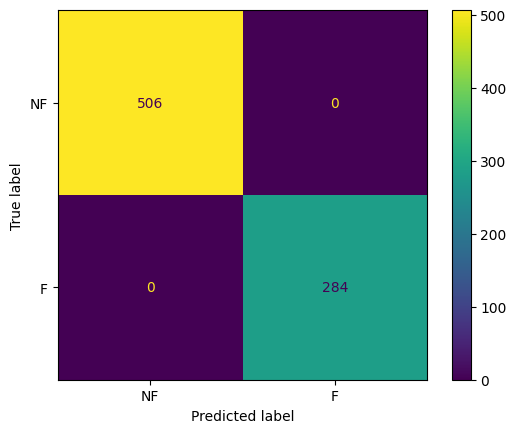

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(hot_enc_seq,labels_nat, test_size=340, random_state=1)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=170, random_state=1)   # 15% test and 15% validation

model_c=LogisticRegression(max_iter=1000)
model_c.fit(X_train,y_train)
y_pred = model_c.predict(X_train)
prob=model_c.predict_proba(X_train)
cm = confusion_matrix(y_train, y_pred)
print(f'The accuracy is {metrics.accuracy_score(y_train,y_pred)*100}%')

disp=ConfusionMatrixDisplay(cm, display_labels=['NF','F'])
disp.plot()
plt.rcParams.update({'font.size': 10})
plt.grid(False)
plt.show()

Now let's try it on the validation test and study its accuracy:

[[90 10]
 [22 48]]
The accuracy is 81.17647058823529%


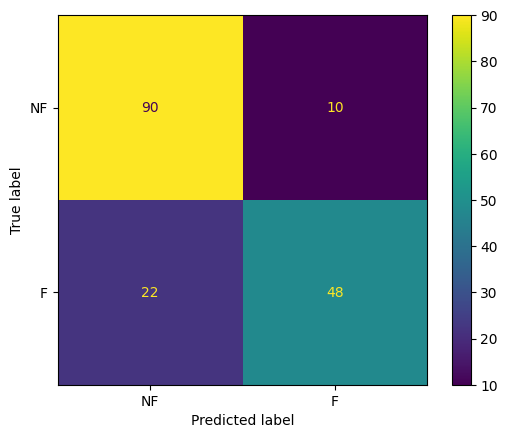

In [20]:
y_pred = model_c.predict(X_valid)   # making prediction on validation
prob=model_c.predict_proba(X_valid)
cm = confusion_matrix(y_valid, y_pred)

print(cm)
print(f'The accuracy is {metrics.accuracy_score(y_valid,y_pred)*100}%')

disp=ConfusionMatrixDisplay(cm, display_labels=['NF','F'])
disp.plot()
plt.rcParams.update({'font.size': 10})
plt.grid(False)
plt.show()

As far as we know, the classifier assign a protein to be functional if $P$(protein) $> 0.5$. Let's tune this probability parameter (without exceeding in values) to see if for a different value of the parameter we can obtain better accuracy.

Best Threshold: 0.35000000000000003
Confusion Matrix with Best Threshold:
[[87 13]
 [19 51]]
The accuracy with Best Threshold is 81.18%


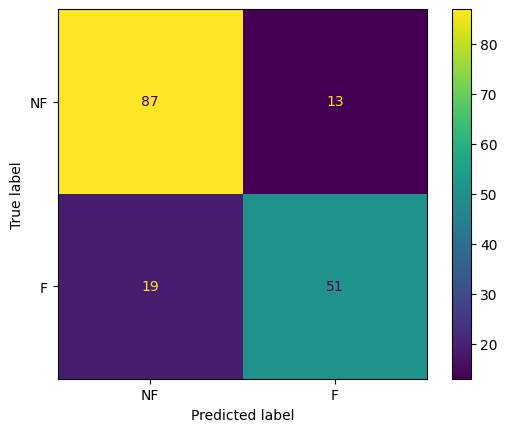

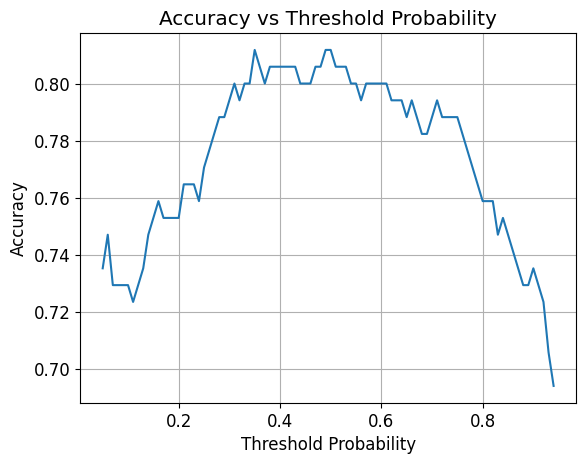

In [21]:
def threshold_predictions(probabilities, threshold):
    p_ones = np.array([prob[j][1] for j in range(np.shape(prob)[0])])
    binary_predictions = (p_ones >= threshold).astype(int)
    return binary_predictions


# Train the logistic regression model
model_c = LogisticRegression(max_iter=1000)
model_c.fit(X_train, y_train)

# Predict probabilities on the validation set
prob_valid = model_c.predict_proba(X_valid)

# Vary the threshold from 0.05 to 0.95
threshold_values = np.arange(0.05, 0.95, 0.01)

# Store accuracy values for each threshold
accuracies = []

for threshold in threshold_values:
    # Use your thresholding function
    y_pred_thresholded = threshold_predictions(prob_valid, threshold)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_valid, y_pred_thresholded)
    accuracies.append(accuracy)

# Find the threshold that maximizes accuracy
best_threshold = threshold_values[np.argmax(accuracies)]
print(f'Best Threshold: {best_threshold}')

# Use the best threshold to generate final predictions
y_pred_best_threshold = threshold_predictions(prob_valid, best_threshold)

# Calculate and display the confusion matrix
cm_best_threshold = confusion_matrix(y_valid, y_pred_best_threshold)

print("Confusion Matrix with Best Threshold:")
print(cm_best_threshold)

print(f'The accuracy with Best Threshold is {metrics.accuracy_score(y_valid, y_pred_best_threshold) * 100:.2f}%')

# Display the confusion matrix plot
disp_best_threshold = ConfusionMatrixDisplay(cm_best_threshold, display_labels=['NF', 'F'])
disp_best_threshold.plot()
plt.rcParams.update({'font.size': 12})  # You can adjust the font size as needed
plt.grid(False)
plt.show()

print("")

# Plot the accuracy vs threshold
plt.plot(threshold_values, accuracies)
plt.xlabel('Threshold Probability')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold Probability')
plt.grid(True)
plt.show()

Results of validation show that the best accuracy is given for $0.5$ and $0.35$, so we can keep the classifier as it is with the basic feature.
Now let's test our model onto the test set to get its real accuracy.

[[85 16]
 [26 43]]
The accuracy is 75.29411764705883%


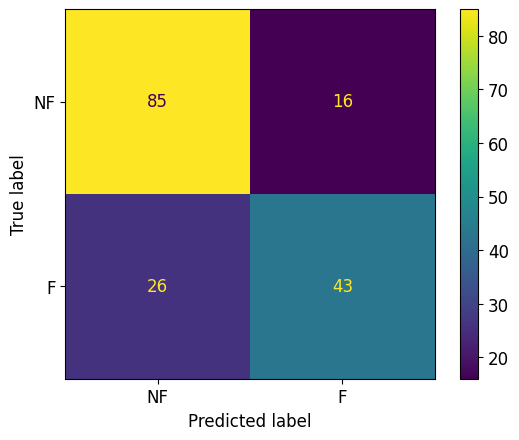

In [22]:
model_c=LogisticRegression(max_iter=500)
model_c.fit(X_train,y_train)                                # fitting the model
y_pred = model_c.predict(X_test)

prob = model_c.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'The accuracy is {metrics.accuracy_score(y_test,y_pred)*100}%')

disp=ConfusionMatrixDisplay(cm, display_labels=['NF','F'])
disp.plot()
plt.rcParams.update({'font.size': 10})
plt.grid(False)
plt.show()

Changing the value of the threshold we get the same accuracy. The last case is symmetric in the number of false positives and false negatives.

The accuracy is 75.29411764705883%


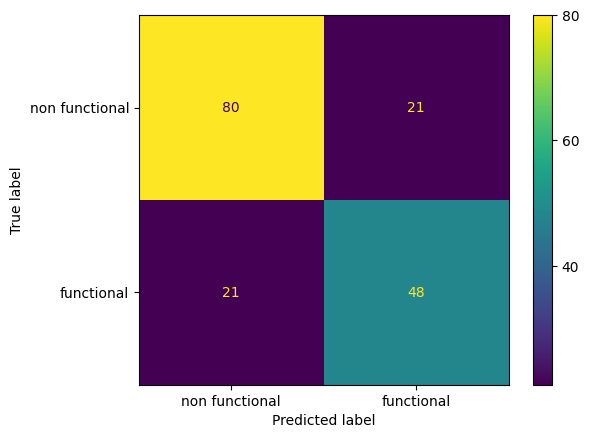

In [23]:
prob_test = model_c.predict_proba(X_test)

pred_t = threshold_predictions(prob_test,0.35)
cm_test = confusion_matrix(y_test, pred_t)
print(f'The accuracy is {metrics.accuracy_score(y_test,pred_t)*100}%')

disp=ConfusionMatrixDisplay(cm_test, display_labels=['non functional','functional'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

###Artificial Sequences: Test

The aim would be to compare the performance of the classifier on the two datasets. If The results are more or less similar it means that there is no difference (as we would be expecting from previous analisys) between the datasets.
**ATTENTION** we don't re-train the classifier on this data, we just test it onto this dataset but trained with the other!

The accuracy is 77.26819541375872%



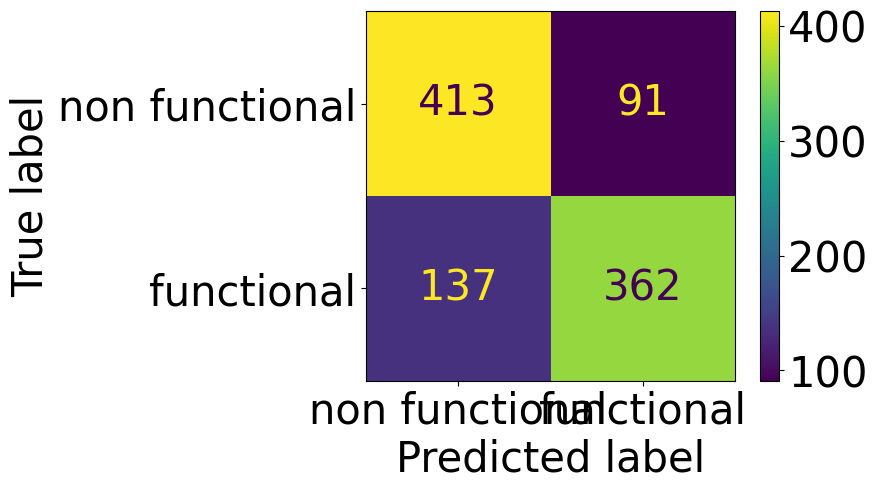

In [24]:
prob_art = model_c.predict_proba(hot_enc_seq_art)
threshold = 0.5  # Adjust the threshold as needed
pred_t = (prob_art[:, 1] > threshold).astype(int)  # Assuming the second column represents the positive class

cm_test = confusion_matrix(labels_art, pred_t)

print(f'The accuracy is {metrics.accuracy_score(labels_art, pred_t) * 100}%')
print("")
disp = ConfusionMatrixDisplay(cm_test, display_labels=['non functional', 'functional'])
disp.plot()
plt.rcParams.update({'font.size': 25})
plt.grid(False)
plt.show()

The accuracy is pretty similar to the one achieved onto the natural test set. This is good because it means that our dataset are almost indistinguishable. This is coherent with the analysis so-far developed.

## Random Forest

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

X, y = hot_enc_seq, labels_nat

# Divide i dati in set di addestramento e test (70% per addestramento, 30% per test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea un modello RandomForestClassifier
model_f = RandomForestClassifier(random_state=42)

# Definisci i parametri per la griglia di ricerca
parameters = {
    'n_estimators': [25,30,35,40,45,50,55,60,65],
    'max_depth': [1,10,20,30,40,50]
}

# Crea un oggetto GridSearchCV per la ricerca dei parametri migliori
grid_search = GridSearchCV(model_f, parameters, cv=5)

# Esegue la griglia di ricerca con i dati di addestramento
grid_search.fit(X_train, y_train)

# Ottieni i parametri ottimali trovati dalla griglia di ricerca
best_params = grid_search.best_params_

# Addestra il modello con i parametri ottimali trovati
model_f = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
model_f.fit(X_train, y_train)

# Valuta il modello sui dati di TEST NAT
y_pred = model_f.predict(X_test)

#TEST sulle ART
X_test_art, y_test_art = hot_enc_seq_art, labels_art
y_pred_art = model_f.predict(X_test_art)

In [29]:
print("Best Parameters: ",best_params)

Best Parameters:  {'max_depth': 50, 'n_estimators': 55}


The accuracy is 81.41592920353983%


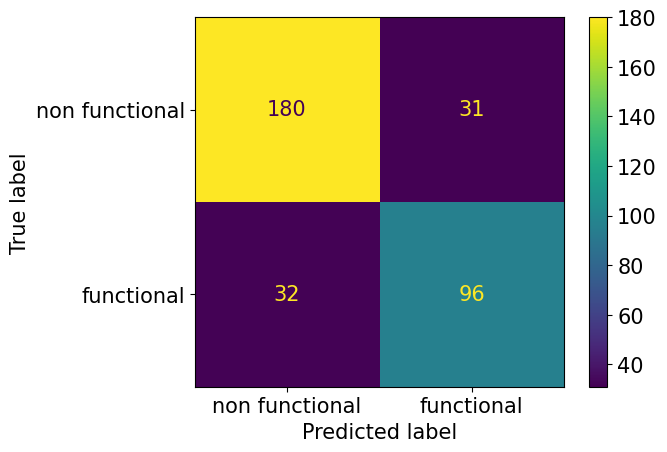

In [30]:
# Calcola la confusion matrix Nat
confusion_mtx = confusion_matrix(y_test, y_pred)

print(f'The accuracy is {metrics.accuracy_score(y_test, y_pred)*100}%')

# Visualizza la confusion matrix
disp=ConfusionMatrixDisplay(confusion_mtx, display_labels=['non functional','functional'])
disp.plot()
plt.rcParams.update({'font.size': 15})
plt.grid(False)
plt.show()

Artificial Set:

The accuracy is 75.67298105682951%


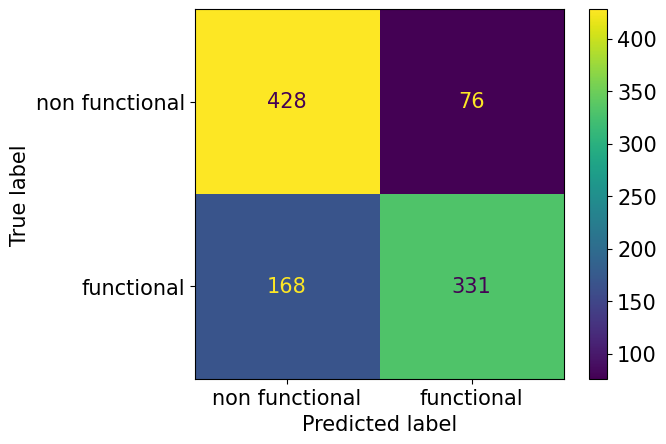

In [31]:
X_test_art, y_test_art = hot_enc_seq_art, labels_art
y_pred_art = model_f.predict(X_test_art)

confusion_mtx = confusion_matrix(y_test_art, y_pred_art)

print(f'The accuracy is {metrics.accuracy_score(y_test_art, y_pred_art)*100}%')

# Visualizza la confusion matrix
disp=ConfusionMatrixDisplay(confusion_mtx, display_labels=['non functional','functional'])
disp.plot()
plt.rcParams.update({'font.size': 15})
plt.grid(False)
plt.show()

##Neural Network

In [41]:
X = np.concatenate([hot_enc_seq , hot_enc_seq_art])
y = np.concatenate([labels_nat, labels_art])


# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize the data (neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Probabilistic classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=13, batch_size=32, validation_split=0.3)

Epoch 1/13
33/33 [==============================] - 1s 13ms/step - loss: 0.5374 - accuracy: 0.7378 - val_loss: 0.4539 - val_accuracy: 0.7746
Epoch 2/13
33/33 [==============================] - 0s 8ms/step - loss: 0.2268 - accuracy: 0.9167 - val_loss: 0.4585 - val_accuracy: 0.7835
Epoch 3/13
33/33 [==============================] - 0s 9ms/step - loss: 0.1391 - accuracy: 0.9560 - val_loss: 0.4815 - val_accuracy: 0.7835
Epoch 4/13
33/33 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9789 - val_loss: 0.5038 - val_accuracy: 0.7701
Epoch 5/13
33/33 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 0.9866 - val_loss: 0.5420 - val_accuracy: 0.7612
Epoch 6/13
33/33 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9933 - val_loss: 0.5799 - val_accuracy: 0.7589
Epoch 7/13
33/33 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9962 - val_loss: 0.6388 - val_accuracy: 0.7567
Epoch 8/13
33/33 [=

10/10 [==============================] - 0s 2ms/step


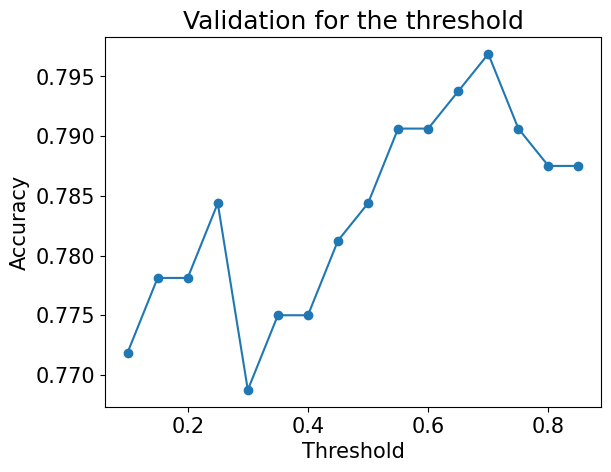

In [42]:
hyperparameter_values = np.arange(0.10,0.90,0.05)
accuracies=[]

y_pred_proba_val = model.predict(X_val_scaled)

for percs in hyperparameter_values:
    # Build the neural network model with varying hyperparameter
    y_pred = (y_pred_proba_val > percs ).astype(int)
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy for this hyperparameter value
    accuracies.append(accuracy)

# Plot the results
plt.plot(hyperparameter_values, accuracies, marker='o')
plt.title('Validation for the threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

In [43]:
print(accuracies.index(max(accuracies)))

12


In [44]:
# Make predictions on the test set
y_pred_proba_test = model.predict(X_test_scaled)
pred = (y_pred_proba_test > hyperparameter_values[accuracies.index(max(accuracies))] ).astype(int)
# Evaluate the model
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

20/20 [==============================] - 0s 1ms/step
Accuracy: 81.88%


In [46]:
Precision = 0
TOT = 0
j = 0
for i in y_test:
  if pred[j]==1:
    TOT += 1
    if i==1:
      Precision += 1
  j += 1
Precision = Precision/TOT
print("Precision: ",Precision)

Precision:  0.8160919540229885


#TASK 5: Generation

## Energy Based Approach: Potts Model

In [47]:
#DATASET FUNCTIONAL
dataset=[]
for record_id, record in records.items():
    description_parts = record.description.split()

    # Extract the functionality information (assuming it's the last part)
    functionality = description_parts[-1].lower()
    if functionality == 'functional_true':
            dataset.append(record)
for record_id, record in records_art.items():
    # Accessing information in the record
    description_parts = record.description.split()

    # Extract the functionality information (assuming it's the last part)
    functionality = description_parts[-1].lower()
    if functionality == 'functional_true':
            dataset.append(record)

In [49]:
#CALCOLO FREQUENZE P
alphabet = ['-','A','C','D','E','F','G','H','I','K','L','M','N','P','Q', 'R','S','T','V','W','Y']
amino = [[dataset[i][j] for i in range(len(dataset))] for j in range(len(dataset[0]))]#this iterates in all the sites, sarebbe il trasposto del dataset: proteine messe in colonna
P = []
for ami in amino:
  p_i = [] # lista dei conteggi
  for a in alphabet:
    p_i.append(ami.count(a))
  P.append(p_i)
P = np.array(P)
P = P / len(dataset)

non_zero_elements = [element for element in P if element.any() != 0]

In [50]:
nsamples = 1000
sample = []
for i in range(nsamples):
  sequence = ''
  for i in range(len(dataset[0])):
    sequence = sequence + np.random.choice(alphabet, p = P[i])
  sample.append(sequence)

In [51]:
def encode_protein(protein_sequence, amino_acid_mapping):
    encoded_sequence = [amino_acid_mapping[amino_acid] for amino_acid in protein_sequence]
    return encoded_sequence
#SAMPLES
one_hot_enc_gen=[]
for protein in sample:
    one_hot_enc_gen.append(encode_protein(protein,amino_acid_mapping))
one_hot_enc_gen= np.array(one_hot_enc_gen)
one_hot_enc_gen = one_hot_enc_gen.reshape(1000,1920)

#FUNCTIONAL
hot_enc_func=[]
for protein in dataset:
    hot_enc_func.append(encode_protein(protein,amino_acid_mapping ))
hot_enc_func= np.array(hot_enc_func)
hot_enc_func = hot_enc_func.reshape(922,1920)

922
20


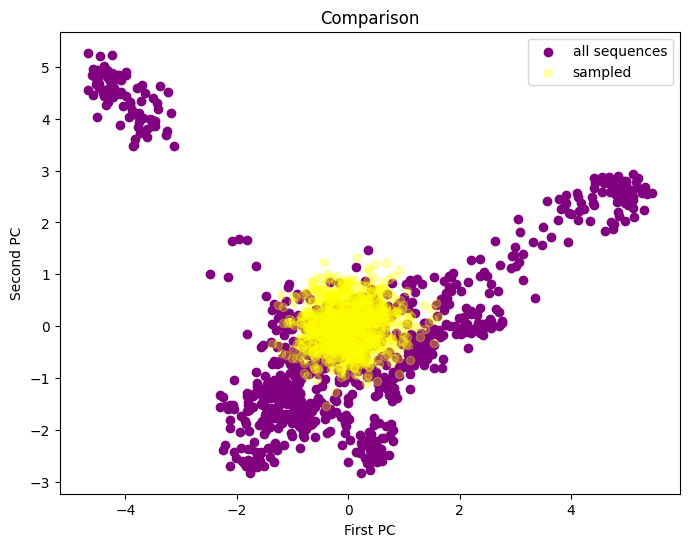

In [52]:
pca = PCA(2).fit(hot_enc_func)
hd_proj_2_s = pca.transform(one_hot_enc_gen)
hd_proj_2_t = pca.transform(hot_enc_func)
plt.style.use('default')
plt.figure(figsize=(8,6))
plt.scatter(hd_proj_2_t[:, 0], hd_proj_2_t[:, 1], color="purple",  label = 'all sequences')
plt.scatter(hd_proj_2_s[:, 0], hd_proj_2_s[:, 1], color="yellow", label = 'sampled',alpha=0.3)
plt.title("Comparison")
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.legend()

In [53]:
X_test_scaled_gen = scaler.transform(one_hot_enc_gen)
y_pred_proba = model.predict(X_test_scaled_gen)

pred = (y_pred_proba > hyperparameter_values[accuracies.index(max(accuracies))]).astype(int)
uni=[1] * 1000

# Evaluate the model
score = accuracy_score(uni, pred)

print(f"Score: {score * 100:.2f}%")
print(f"Expected Fraction of Correctily Generated Sequences: {score*Precision + (1-score)*(1-Precision)}")

32/32 [==============================] - 0s 2ms/step
Score: 85.70%
Expected Fraction of Correctily Generated Sequences: 0.7256896551724137
